                        Pet Classification Model Using CNN.
    
                                    Project 3 
        
DESCRIPTION

Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 

Project Description and Scope: 

You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data.

In [1]:
#Load Libraries
import tensorflow
import keras
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle

C:\Users\lloyd\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lloyd\anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lloyd\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using TensorFlow backend.


#Observing some of the images

100%|██████████| 13501/13501 [00:00<00:00, 101542.67it/s]


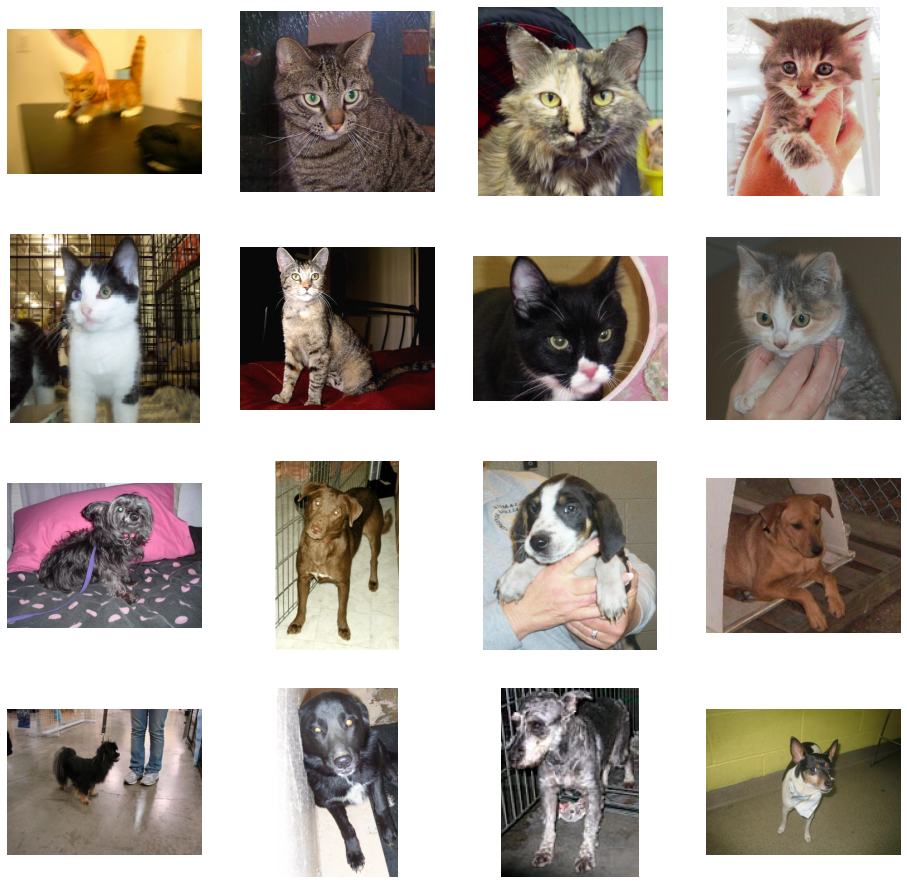

In [2]:
train_cat_file_names='E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/cats/'
train_dog_file_names='E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/dogs/'
cat_img_paths = [os.path.join(train_cat_file_names, filename) for filename in tqdm(os.listdir(train_cat_file_names))]
dog_img_paths = [os.path.join(train_dog_file_names, filename) for filename in tqdm(os.listdir(train_dog_file_names))]
fig = plt.figure(figsize=(16,8))
fig.set_size_inches(16, 16)
for i, img_path in enumerate(cat_img_paths[:8]+dog_img_paths[:8]):
    ax=plt.subplot(4,4,i+1)
    ax.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

### Data Augmentation

In [3]:
def load_images(cat_path, dog_path):
    global image
    images=[]
    labels=[]
    i=0
    
    datasets=[cat_path, dog_path]
    
    #Iterate through each foler corresponding to category
    for folder in datasets:
        for file in tqdm(os.listdir(folder)):
            
            #Get the path name for each image
            image_path = os.path.join(folder, file)
            
            #Open the image
            image = cv2.imread(image_path)
            
            #Resize the image
            if(image is not None):
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (100, 100))
            
            #Append images and labels
                images.append(image)
                labels.append(i)
        i+=1      
    images=np.array(images, dtype='float32')
    return images, labels

In [4]:
cat_path="E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/cats/"
dog_path="E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/train/dogs/"
x_train, y_train = load_images(cat_path, dog_path)

100%|██████████| 13501/13501 [04:26<00:00, 50.69it/s]


In [5]:
cat_path="E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/test/cats/"
dog_path="E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Deep_Learning_Tensorflow_Keras/projects/image classification/data/test/dogs/"
x_val, y_val = load_images(cat_path, dog_path)

100%|██████████| 10/10 [00:00<00:00, 56.96it/s]


In [6]:
x_val = x_val/255
x_train = x_train/255

Task 1: Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers:

    ● Input layer 

    ● Convolutional layer 1 with 32 filters of kernel size[3,3] 
    
    ● Pooling layer 1 with pool size[2,2]
    
    ● Convolutional layer 2 with 64 filters of kernel size[3,3] 
    
    ● Pooling layer 2 with pool size[2,2]
    
    ● Convolutional layer 3 with 128 filters of kernel size[3,3] 
    
    ● Pooling layer 2 with pool size[2,2]
    
    ● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
    
    ● Dropout layer with dropout probability 0.8 
    
    Predict the class by doing a sigmoid on the output of the dropout layers. 

In [7]:
model=Sequential([Conv2D(32, kernel_size=(3,3), input_shape=(100,100,3), activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
           
          Conv2D(64, kernel_size=(3,3), activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          
          Conv2D(128, kernel_size=(3,3), activation='relu'),
          MaxPooling2D(pool_size=(2,2)),

          Flatten(),  
          Dense(32),
          Dropout(rate=0.8),
           
          Dense(1, activation='sigmoid'),
           ]
          )

Task 2: This should be followed by training and evaluation: 
    
    ● For the training step, define the loss function and minimize it 

In [8]:
#Compile Model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

Task 2: For the evaluation step, calculate the accuracy

        Run the program for 10

In [10]:
#Fit the model
model.fit(x_train, np.array(y_train), epochs=10, validation_data=(x_val, np.array(y_val)), batch_size=100)

Epoch 1/10
270/270 [==============================] - 215s 796ms/step - loss: 0.6541 - accuracy: 0.6038 - val_loss: 0.5394 - val_accuracy: 0.8500
Epoch 2/10
270/270 [==============================] - 201s 744ms/step - loss: 0.5400 - accuracy: 0.7353 - val_loss: 0.4270 - val_accuracy: 0.7500
Epoch 3/10
270/270 [==============================] - 168s 622ms/step - loss: 0.4576 - accuracy: 0.7943 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 4/10
270/270 [==============================] - 167s 619ms/step - loss: 0.3999 - accuracy: 0.8288 - val_loss: 0.3679 - val_accuracy: 0.8000
Epoch 5/10
270/270 [==============================] - 169s 626ms/step - loss: 0.3647 - accuracy: 0.8436 - val_loss: 0.2942 - val_accuracy: 0.8500
Epoch 6/10
270/270 [==============================] - 166s 616ms/step - loss: 0.3246 - accuracy: 0.8692 - val_loss: 0.2982 - val_accuracy: 0.8000
Epoch 7/10
270/270 [==============================] - 175s 648ms/step - loss: 0.3009 - accuracy: 0.8802 - val_loss: 0.1618 -

In [11]:
model.save('cnn_model.h5')